####**First , We install required libararies which used to make this model**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

####***To make our calculation easy we convert yes and no into 1 and 0***

####***Now its time to import Our CSV file for this Model***

In [ ]:
url = 'https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction'

# Download the data from Kaggle
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

!unzip housing-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 4.48MB/s]
Archive:  housing-price-prediction.zip
  inflating: Housing.csv             


In [ ]:
df = pd.read_csv('Housing.csv')

#Print first 15 values from the CSv to check That is the CSV is Correct or Not
print(df.head(15))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

#**EDA Analysis for this CSV**

####**Check that is there any missing values is in the CSV or not**

In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


####***As we see that there is no missing values in this CSV file***

####***Summary Statistice for this CSv file***

In [ ]:
#This is used to file the max ,min ,std,count, 75% etc, value from a CSv file or a Dataframe
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


####***Check the total non null values per column and Datatyle of each colum from the CSV file***

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


####***Correlation matrix of this CSV***

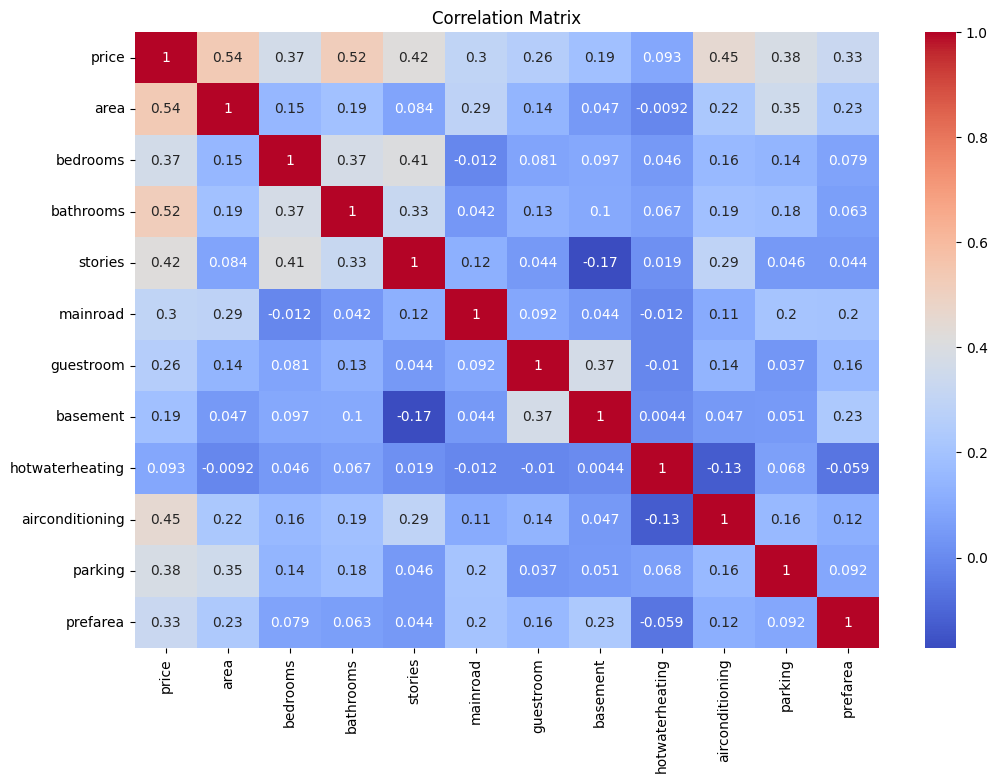

In [ ]:
#First we remove the furnishingstatus column because we know that its an object type and heatmap only takes int type data
df1 = df.drop('furnishingstatus',axis=1)

# Convert columns with 'yes'/'no' values to numerical (1/0)
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    if column in df1.columns:
        df1[column] = df1[column].map({'yes': 1, 'no': 0})

#Now we make a heatmap of correlation between the columns
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

####***Now we make a pie chart of the furnishingstatus column***

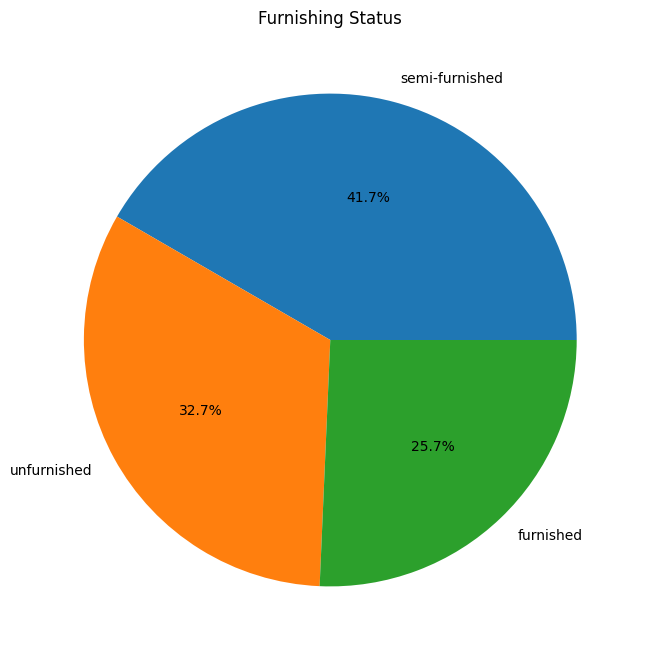

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(df['furnishingstatus'].value_counts(),labels=df['furnishingstatus'].value_counts().index,autopct='%1.1f%%')
plt.title('Furnishing Status')
plt.show()

####***Now we use pairplot to make all requied plot for this CSV***

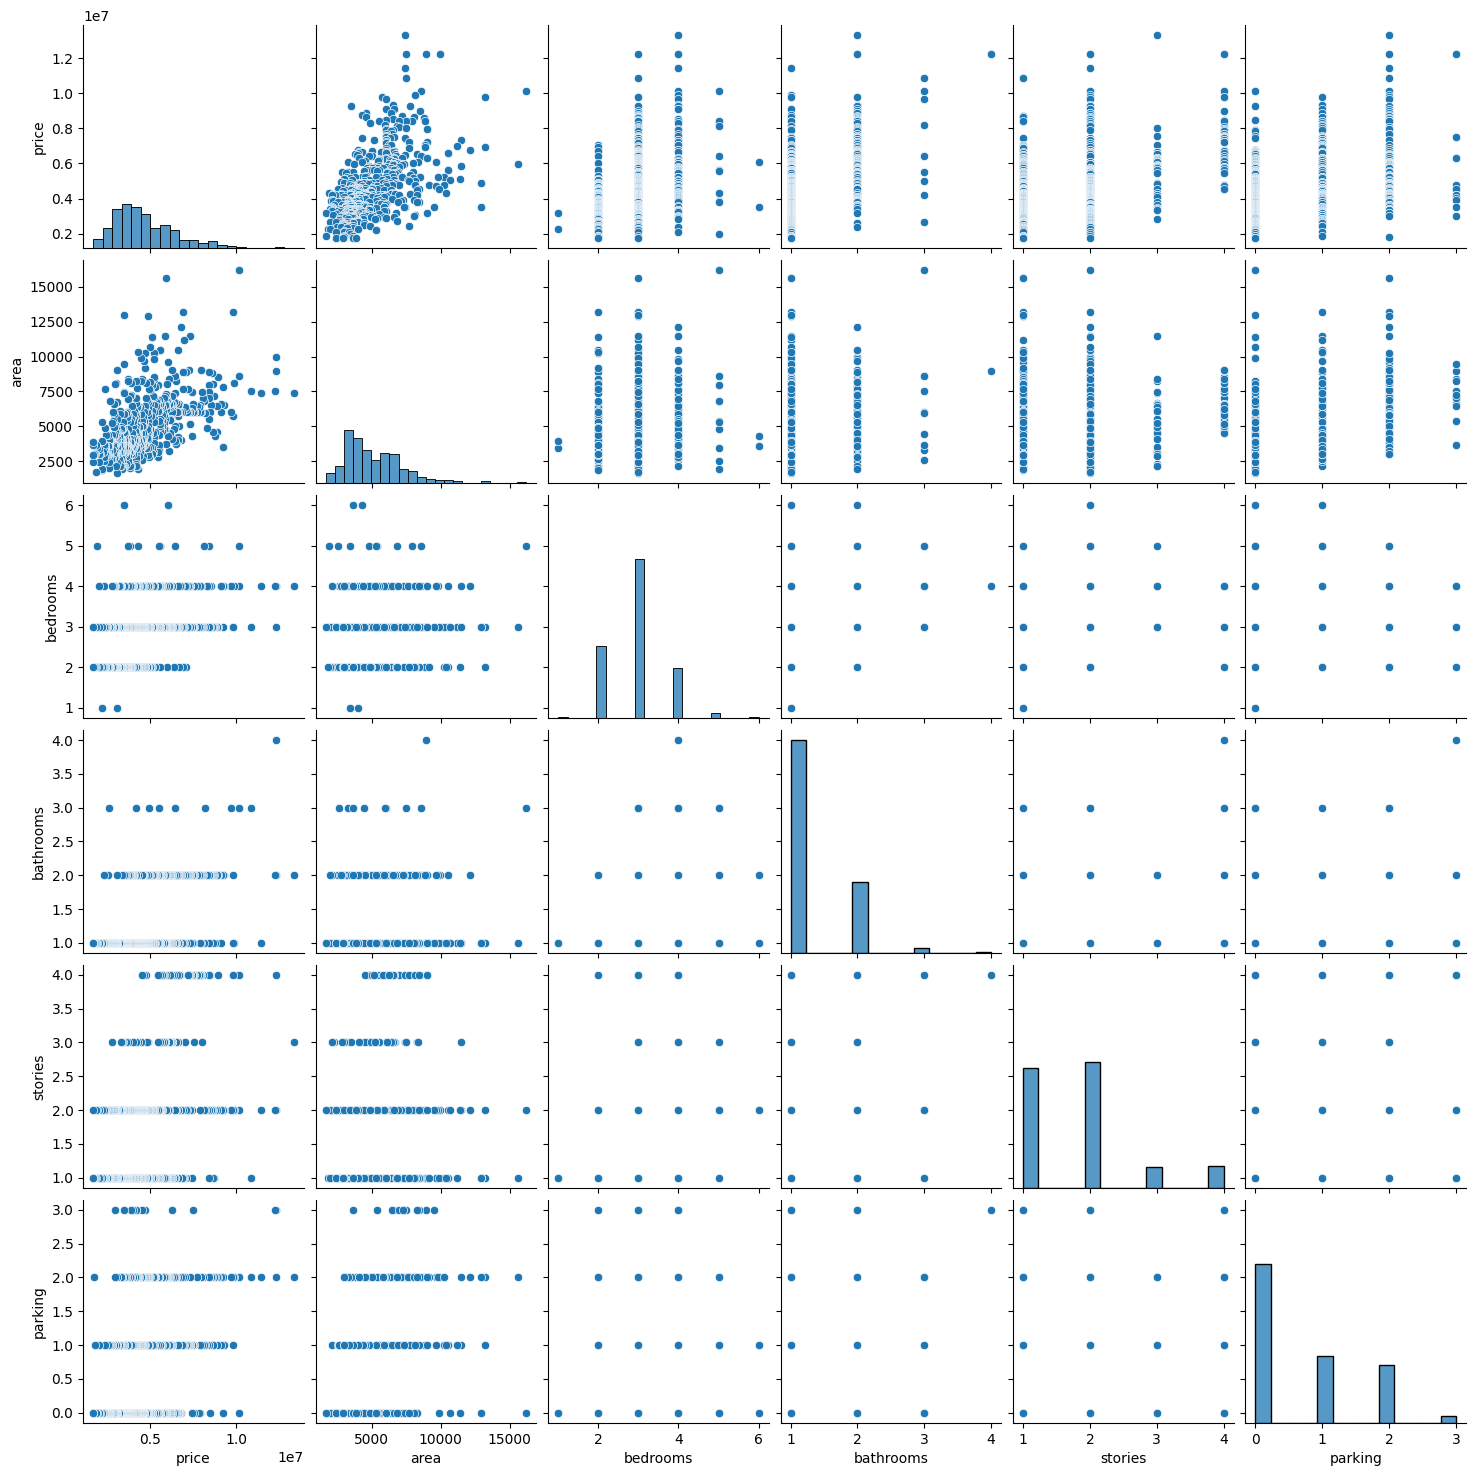

In [ ]:
sns.pairplot(df)
plt.show()

####***To make our calculation easy we convert yes and no into 1 and 0***

In [ ]:
df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)

print(df.head(15))

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

<ipython-input-12-73aff477a9af>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)


#**Prepare data form model traning**

####***selection of Features and Target from the CSV for the model***

In [ ]:
#for this fisrt we have to convert furnishingstatus column into int data type so the model takes the values from that other its shows error
df = df.replace({'furnished': 1, 'semi-furnished': 2,'unfurnished': 3}).infer_objects(copy=False)

<ipython-input-13-46fcf3fff87e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'furnished': 1, 'semi-furnished': 2,'unfurnished': 3}).infer_objects(copy=False)


In [ ]:
#here x_data dataframe refers to the features which affect the model
#here y_data dataframe refers to the target value of the model
x_data = df.drop('price',axis=1)
y_data = df['price']

In [ ]:
#print X_data and y_data

print(x_data)
print(y_data)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

####***Now we split the X_data and Y_data into test and train datas***

In [ ]:
#here train data use to train the model and test data use to test the model after traning

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=10)

#**Bulding and Traning the Model**

#***Model = Linear Regression***

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

####***Now we store the predict value using by our model by gave x_test values to the model in Y_pred dataframe***

In [ ]:
y_pred = model.predict(x_test)

####***get the accurasy score of the model***

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7331102153370126


####***Now we make a graph scatter plot between predicted price and the real price***

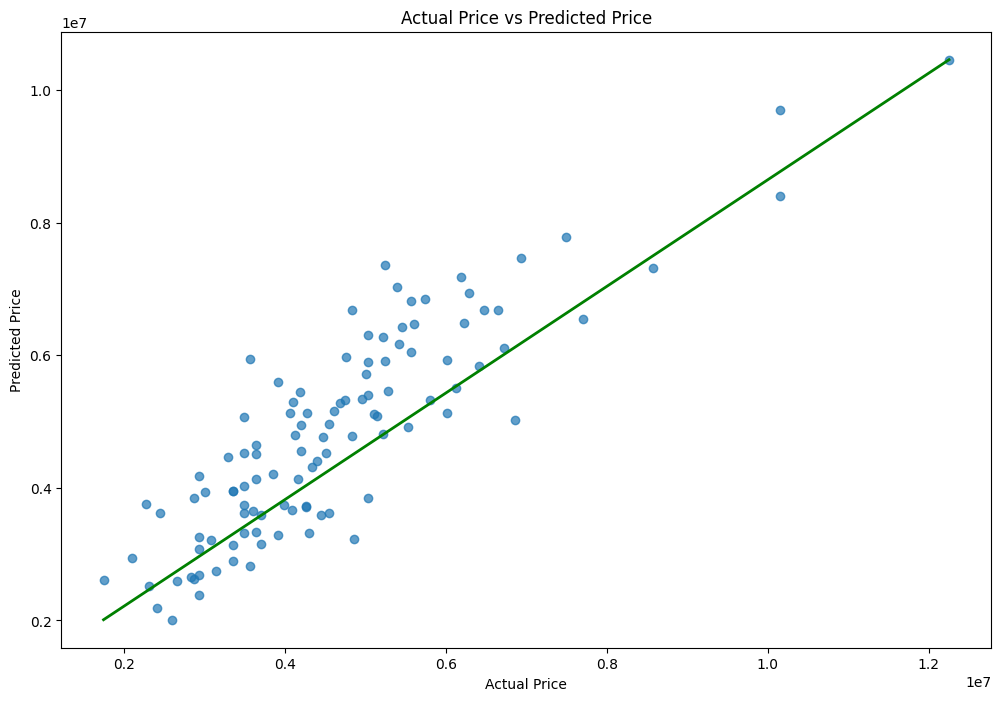

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred ,alpha=0.7)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],'g', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

####***Now we use a user data to test our model that is it working or now and get the price from the model by gave it a user define values***

In [ ]:
user_data = {
    'area' : 5568,
    'bedrooms' : 3,
    'bathrooms' : 3,
    'stories' : 1,
    'mainroad' : 0,
    'guestroom' : 1,
    'basement' : 0,
    'hotwaterheating' : 1,
    'airconditioning' : 1,
    'parking' : 0,
    'prefarea' : 0,
    'furnishingstatus' : 2
    }

user_df = pd.DataFrame(user_data,index=[0])

print(user_df)

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  5568         3          3        1         0          1         0   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                1                1        0         0                 2  


In [ ]:
result = model.predict(user_df)
print(result)

[6891208.16629554]
